In [ ]:
#lets first read in the data from the cleaned csv file
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned.csv')


In [ ]:
#Okay, now we can start exploring the data, in particular, the demographic and financial columns.

#lets first look at the columns we have to work with
df.columns



Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

Looking at the columns, the financial columns are:


policy_annual_premium, policy_deductible, capital-gains, capital-loss, and umbrella_limit

We will first take a look at policy annual premium.



A policy annual premium is the total amount of money you pay an insurance company for coverage over a one-year period.

“Policy” = your insurance contract.

“Premium” = the cost you pay for that contract.

“Annual” = the full amount for a 12-month period.

In [6]:
#Lets first start taking a look at a few of the financial columns, we can start with policy_annual_premium


df.groupby('fraud_reported')['policy_annual_premium'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1258.430000,241.247210,433.33,1097.640,1253.12,1422.56,2047.59
Y,247.0,1250.236275,253.263651,484.67,1062.615,1269.64,1396.33,1935.85


Counts: 753 non-fraud (N) vs 247 fraud (Y) — fraud ~25% of cases.

Central tendency: means and medians are nearly identical (mean N 1258.4 vs Y 1250.2; median N 1253.1 vs Y 1269.6). No large shift.

Spread/outliers: std and IQR are similar; fraud has slightly higher std but slightly lower 75th and max.

Practical takeaway: policy_annual_premium alone shows little raw separation between fraud/non-fraud — unlikely to be a strong standalone predictor.

<Figure size 1200x600 with 0 Axes>

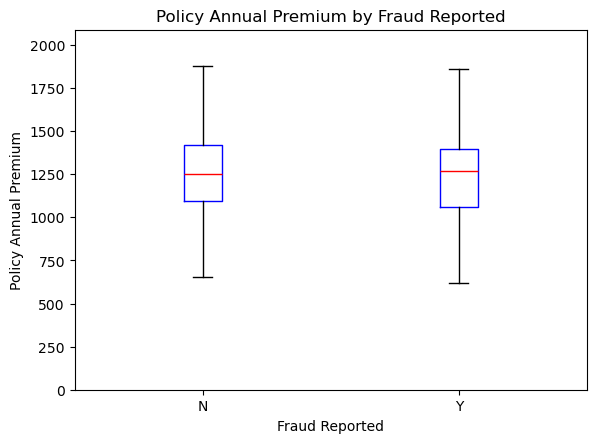

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
ax = df.boxplot(column='policy_annual_premium', by='fraud_reported', grid=False, showfliers=False,
                color=dict(boxes='blue', whiskers='black', medians='red', caps='black'))
plt.title('Policy Annual Premium by Fraud Reported')
plt.suptitle('')
plt.xlabel('Fraud Reported')
plt.ylabel('Policy Annual Premium')

# allow full range (a small buffer so top whisker is visible)
plt.ylim(0, df['policy_annual_premium'].max() * 1.02)
plt.show()

In [8]:
#Oky, now lets do the same thing, but this time we will take a look at fraud reported by policy deductible

df.groupby('fraud_reported')['policy_deductable'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1130.810093,606.771634,500.0,500.0,1000.0,2000.0,2000.0
Y,247.0,1151.821862,628.123674,500.0,500.0,1000.0,2000.0,2000.0


At least in this dataset, deductible amount doesn’t seem to strongly distinguish fraud from non-fraud.

Both groups cluster around the same key values ($500, $1,000, $2,000).

The small difference in means isn’t meaningful because the standard deviations are huge (~600+).

So this variable by itself probably isn’t a strong fraud predictor.
But → it could still matter in combination with other features (e.g., deductible + claim amount, deductible + insured occupation).